# Lab 3: The Shooting Method for Boundary Value Problems

Sean Wade

In [14]:
import numpy as np
import scipy as sp
import seaborn
from matplotlib import pyplot as plt
from scipy.integrate import odeint

In [15]:
% matplotlib inline

In [16]:
def find_t(f,a,b,alpha,beta,t0,t1,maxI):
    sol1 = 0
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol0 = odeint(f,np.array([alpha,t0]), [a,b],atol=1e-10)[1,0]
        sol1 = odeint(f,np.array([alpha,t1]), [a,b],atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1 = t2
        i = i+1
    if i == maxI:
        print "t not found"
    return t2


def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI):
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol


def ode(y,x):
    return np.array([y[1], -4*y[0]-9*np.sin(x)])

### Problem 1

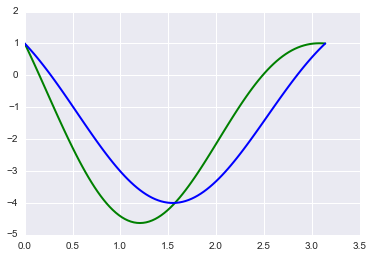

In [17]:
X = np.linspace(0,np.pi,100)
Y1 = solveSecant(ode, X, 0, np.pi, 1, 1, 1.5, -1, 40)
Y2 = solveSecant(ode, X, 0, np.pi, 1, 1, 2, -1, 40)

plt.plot(X,Y1,'-k', c='g', linewidth=2)
plt.plot(X,Y2,'-k', c='b',linewidth=2)
plt.show()

### Problem 2

In [18]:
def find_t_newt(f, a, b, alpha, beta, t0, maxI):
    
    sol1 = 0
    i = 0
    while abs(sol1-beta) > 10**-8 and i < maxI:
        sol = odeint(f,np.array([alpha, t0, 0, 1]), [a,b], atol=1e-10)
        sol1 = sol[1,0]
        sol2 = sol[1,2]
        t1 = t0 - (sol1 - beta)/sol2
        t0 = t1
        i+=1
        
    if i == maxI:
        print "t not found"
    return t1


def solveNewton(f, X, a, b, alpha, beta, t0, maxI):
    t = find_t_newt(f, a, b, alpha, beta, t0, maxI)
    sol = odeint(f, np.array([alpha,t, 0, 1]), X, atol=1e-10)[:,0]
    return sol


def ode(y,x):
    return np.array([y[1], 3+2*y[0]/x**2, y[3], (2./x**2)*y[2] + 0*y[3]])


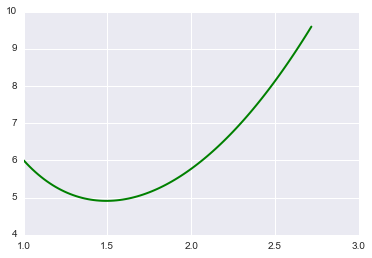

In [21]:
alpha, beta = 6, np.e**2 + 6/np.e
X = np.linspace(1,np.e,100)
Y = solveNewton(ode, X, 1, np.e, alpha, beta, 0, 10)

plt.plot(X,Y,'-k', c='g', linewidth=2)
plt.show()

In [22]:
def find_t_secant(f, a, b, alpha, beta, vel, t0, t1, maxI):
    sol1 = 1
    i = 0
    while abs(sol1 - beta) > 10**-8 and i < maxI:
        sol1 = odeint(f, np.array([alpha, vel, t0]), [a,b], atol=1e-10)[1,0]
        sol2 = odeint(f, np.array([alpha, vel, t1]), [a,b], atol=1e-10)[1,0]
        t2 = t1 - (sol2-beta)*(t1-t0) / (sol2-sol1)
        t0 = t1
        t1 = t2
        i+=1
    if i == maxI:
        print "t not found"
    return t2

In [23]:
def solveSecant(f, X, a, b, vel, alpha, beta, t0, t1, maxI):
    t = find_t_secant(f, a, b, alpha, beta, vel, t0, t1, maxI)
    sol = odeint(f, np.array([alpha, vel, t]), X, atol=1e-10)[:,0]
    return sol

In [24]:
def ode1(c,x):
    return np.array([np.tan(c[2]), (-g*np.sin(c[2])+mu1*c[1]**2)/(c[1]*np.cos(c[2])), -g/(c[1]**2)])

def ode2(c,x):
    return np.array([np.tan(c[2]), (-g*np.sin(c[2])+mu2*c[1]**2)/(c[1]*np.cos(c[2])), -g/(c[1]**2)])

In [34]:
g, mu1, mu2 = 9.8067, .0003, 0

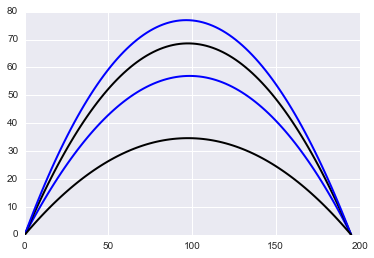

In [33]:
X = np.linspace(0, 195, 100)

Y1 = solveSecant(ode1, X, 0, 195, 45, 0, 0, 4, 5, 100)
Y2 = solveSecant(ode2, X, 0, 195, 45, 0, 0, 4, 5, 100)

Y3 = solveSecant(ode1, X, 0, 195, 45, 0, 0, np.pi/3, 3, 100)
Y4 = solveSecant(ode2, X, 0, 195, 45, 0, 0, np.pi/3, 3, 100)

plt.plot(X, Y1, 'b', linewidth=2)
plt.plot(X, Y2, 'k', linewidth=2)
plt.plot(X, Y3, 'b', linewidth=2)
plt.plot(X, Y4, 'k', linewidth=2)
plt.show()